# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [2]:
!pip install pandas
!pip install wbdata

import wbdata
import pandas as pd

  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0


In [35]:
indicadores = {"NY.GDP.MKTP.CD": "Producto Interno Bruto (PIB) en millones USD", "NY.GDP.MKTP.KD.ZG": "Tasa de Crecimiento del PIB (%)"}

data = wbdata.get_dataframe(indicadores, country=['AR','UY'], date=("2010","2023"))

df = pd.DataFrame(data=data)
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"]/1000000 ## Dividimos el valor por un millón
df["Producto Interno Bruto (PIB) en millones USD"]=df["Producto Interno Bruto (PIB) en millones USD"].apply(round) ## Redondeamos
df = df.reset_index()
df.to_excel('data.xlsx', index=False) ## Exportamos los datos del dataframe en un excel llamado data.

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [ ]:
# Resolver acá



#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

In [4]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [30]:
import os
os.chdir('C:\\Users\\54115\\Desktop\\Python')

In [50]:
df = pd.read_excel('data.xlsx')

## Tomamos los datos referidos al PBI y la tasa de Crec de Arg y Uru.
df_arg = df[df['country'] == 'Argentina']
df_uy = df[df['country'] == 'Uruguay']
df_ex = df[df['country'] == 'Ejemplo'] # Creamos un país llamado "ejemplo", en el cual los valores de los indicadores son 0, para que dibuje una línea gris en el gráfico que sirva de comparación.

y1 = df_arg[df_arg['country'] == 'Argentina']['Producto Interno Bruto (PIB) en millones USD']
x1 = df_arg[df_arg['country'] == 'Argentina']['date']

y2 = df_arg[df_arg['country'] == 'Argentina']['Tasa de Crecimiento del PIB (%)']
x2 = df_arg[df_arg['country'] == 'Argentina']['date']

y3 = df_uy[df_uy['country'] == 'Uruguay']['Producto Interno Bruto (PIB) en millones USD']
x3 = df_uy[df_uy['country'] == 'Uruguay']['date']

y4 = df_uy[df_uy['country'] == 'Uruguay']['Tasa de Crecimiento del PIB (%)']
x4 = df_uy[df_uy['country'] == 'Uruguay']['date']

y5 = df_ex[df_ex['country'] == 'Ejemplo']['Producto Interno Bruto (PIB) en millones USD']
x5 = df_ex[df_ex['country'] == 'Ejemplo']['date']

y6 = df_ex[df_ex['country'] == 'Ejemplo']['Tasa de Crecimiento del PIB (%)']
x6 = df_ex[df_ex['country'] == 'Ejemplo']['date']

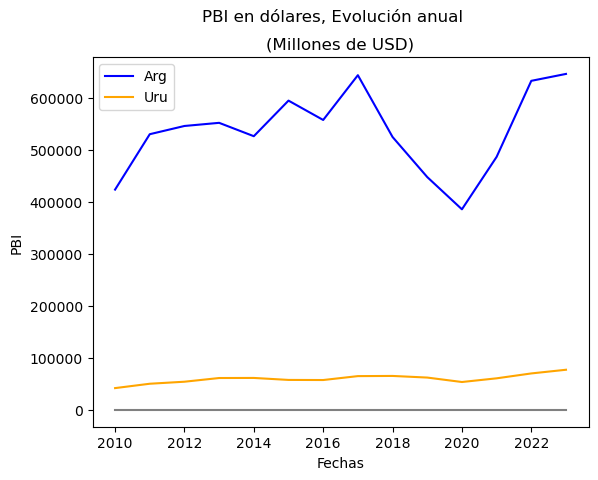

In [46]:
# Realizamos dos gráficos en estilo pyplot.
plt.plot(x1, y1, label="Arg", color='blue')
plt.plot(x3, y3, label="Uru", color='orange')
plt.plot(x5, y5, color='grey')

plt.xlabel("Fechas")
plt.ylabel("PBI")
plt.title("(Millones de USD)")
plt.suptitle("PBI en dólares, Evolución anual")

plt.legend(loc='upper left')
plt.savefig('GráficoPBI.png', format='png')
plt.show()

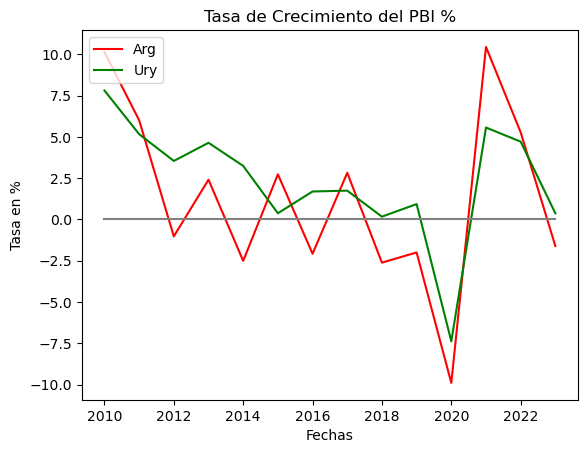

In [47]:
plt.plot(x2, y2, label="Arg", color='red')
plt.plot(x4, y4, label="Ury", color='green')
plt.plot(x6, y6, color='grey')

plt.xlabel("Fechas")
plt.ylabel("Tasa en %")
plt.title("Tasa de Crecimiento del PBI %")

plt.legend(loc='upper left')
plt.savefig('grafico_tasa.png', format='png')
plt.show()

In [48]:
# Vamos a realizar dos gráficos iguales a los anteriores, pero con estilo orientado a objetos. 
fig, ax = plt.subplots()

ax.plot(x1, y1, label="Arg", color='blue')
ax.plot(x3, y3, label="Uru", color='orange')
ax.plot(x5, y5, color='grey')

ax.set_xlabel("Fechas")
ax.set_ylabel("PBI")
ax.set_title("PBI en millones de USD")

ax.legend(loc='upper left')
fig.savefig('GráficoPBIObjetos.png', format='png')
fig.show()

C:\Users\54115\AppData\Local\Temp\ipykernel_3052\167197807.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [49]:
fig, ax = plt.subplots()

ax.plot(x2, y2, label="Arg", color='red')
ax.plot(x4, y4, label="Ury", color='green')
ax.plot(x6, y6, color='grey')

ax.set_xlabel("Fechas")
ax.set_ylabel("Tasa en %")
ax.set_title("Tasa de Crecimiento del PBI %")

ax.legend(loc='upper left')
fig.savefig('GráficoTasaObjetos.png', format='png')
fig.show()

C:\Users\54115\AppData\Local\Temp\ipykernel_3052\3941879495.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show() #esto es necesario para visualizar


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
